In [15]:
from pyspark.sql import SparkSession, Row, functions
from graphframes import *
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
vertex_location = "file:///home/hatef/courses/term-4/hw3/Datasets/4/Vertex.txt"
edge_location = "file:///home/hatef/courses/term-4/hw3/Datasets/4/edges.txt"
opts = {
  'node_color': 'orange',
   'edge_color': 'blue',
  'node_size': 10,
  'width': 1,
  'with_labels': False,
  'length': 10
}

spark = SparkSession.builder.appName("three").master("local[*]").getOrCreate()

In [17]:
vertex_rdd = spark.read.text(vertex_location)
edge_rdd = spark.read.text(edge_location)

In [18]:
vertex_rdd.take(3)

[Row(value='8774773382640701231\tList of Canadian Football League records (team)'),
 Row(value='7761101435592530731\tList of Football Associations by date of foundation'),
 Row(value='8133629125642450577\tTemplate:2004 Football HOF')]

In [19]:
edge_rdd.take(3)

[Row(value='3205189634386258258\t5457500977524455425'),
 Row(value='7434181864825576211\t3992155592538800813'),
 Row(value='7434181864825576211\t5174708811275211225')]

In [20]:
v = vertex_rdd.select('value').collect()
e = edge_rdd.select('value').collect()

In [21]:
v[:3]

[Row(value='8774773382640701231\tList of Canadian Football League records (team)'),
 Row(value='7761101435592530731\tList of Football Associations by date of foundation'),
 Row(value='8133629125642450577\tTemplate:2004 Football HOF')]

In [22]:
v1 = []
e1 = []

for i, vrow in enumerate(v):
    v1.append(tuple(vrow.value.split("\t")))

for erow in e:
    e1.append(tuple(erow.value.split("\t")))

In [23]:
v_graph = spark.createDataFrame(v1, ["id", "title"])
e_graph = spark.createDataFrame(e1, ["src", "dst"])

In [24]:
g = GraphFrame(v_graph, e_graph)
g.vertices.show()
g.edges.show()

+-------------------+--------------------+
|                 id|               title|
+-------------------+--------------------+
|8774773382640701231|List of Canadian ...|
|7761101435592530731|List of Football ...|
|8133629125642450577|Template:2004 Foo...|
|7698287352205296646|File:North Melbou...|
|2097725138520422255|Georgia Football ...|
|6922631041164063688|Football at the 2...|
|1197038737428485418|Wikipedia:Miscell...|
|2558316557265591251|Football at the 2...|
|1775630591844818068|Serbian Football ...|
|4205664098526595262|Wikipedia:WikiPro...|
|1033687574081081174|1943–44 Netherlan...|
|6862802626977892137|1948–49 Football ...|
|3681282860489534792|1998–99 North Wes...|
|8747320282862100730|1984–85 Football ...|
|7895242920481704787|Template:1976–77 ...|
|4200215839332270980|Black Thunder Rug...|
| 687511193117412416|2008 UEFA Europea...|
|6058169767624236103|Template:College ...|
|1244764815707993800|Template:1976–77 ...|
|5775454784407389519|Football at the 2...|
+----------

In [25]:
### part 2

In [26]:
g.inDegrees.show()
v_in = g.inDegrees
v_out = g.outDegrees
v_in.groupBy().max("inDegree").show()
v_out.groupBy().max("outDegree").show()

+-------------------+--------+
|                 id|inDegree|
+-------------------+--------+
|2715722278057256350|      34|
|8536820836823227269|       1|
|1331972860880417523|       2|
|1369498455317078482|       2|
|3920820843608643779|       5|
|8956307071826070794|       2|
| 585583653337377412|       3|
|1266831434364880157|       6|
|4976384618951573351|       4|
|7733965970274275986|       3|
|8201633371068747181|       7|
|9014197940277658413|       5|
|6078617804064329033|       4|
|5423138579624850276|       1|
|6778984543777808146|       2|
|2408272437532239374|       3|
|4680877142281628492|       2|
|3502541721868043443|       2|
|3451104515148607245|       2|
|5433576273465536249|       1|
+-------------------+--------+
only showing top 20 rows

+-------------+
|max(inDegree)|
+-------------+
|          327|
+-------------+

+--------------+
|max(outDegree)|
+--------------+
|           264|
+--------------+



In [27]:
#part3
result = g.connectedComponents(algorithm="graphx")
result.select("id", "title", "component").orderBy("component",ascending=False).show(150)

+-------------------+--------------------+-------------+
|                 id|               title|    component|
+-------------------+--------------------+-------------+
|9029465816619148420|Category:Football...|1709396983856|
|8922051105056382554|Port Vale Footbal...|1709396983854|
|8912476230417745601|Wikipedia:WikiPro...|1709396983853|
|8347165060474654611|Football, Feminis...|1709396983851|
|7038890166469457700|Portal:Associatio...|1709396983844|
|6516714645198018496|Template:Yugoslav...|1709396983840|
|5734162746066233998|Loughborough Stud...|1709396983837|
|5374158816926323450|Template:2003–04 ...|1709396983832|
|3382478666102853744|Football Tourname...|1709396983819|
|3327811094823991871|Cardiff City Foot...|1709396983816|
|3226861230456022144|Category:Football...|1709396983815|
|2195732933008389504|Template:2012–13 ...|1709396983812|
|1635813021071693158|Category:Football...|1709396983810|
| 902612181095638186|Category:Liberia ...|1700807049269|
|8118610478590661551|Portal:Foo

In [28]:
#part4
g.inDegrees.orderBy("inDegree", ascending=False).show(10)
ids = g.inDegrees.orderBy("inDegree", ascending=False).take(10)
id_list = [ids[i].id for i in range(len(ids))]
# print(id_list)
g.vertices.where(g.vertices.id.isin(id_list)).show()

+-------------------+--------+
|                 id|inDegree|
+-------------------+--------+
| 946065507707541358|     327|
|3856212023725725593|     322|
|8978262722425160811|     316|
|6245498229508734555|     185|
|7264519433548233535|     180|
|5362090331808156011|     179|
| 277710621679830671|     149|
|1984578398767042266|     145|
|2395551540800395672|     134|
|5395033957924805072|     130|
+-------------------+--------+
only showing top 10 rows

+-------------------+--------------------+
|                 id|               title|
+-------------------+--------------------+
| 277710621679830671|All-Ireland Senio...|
|6245498229508734555|Southern Football...|
|2395551540800395672|Football League T...|
|3856212023725725593|National Football...|
|1984578398767042266|Scottish Football...|
|7264519433548233535|Football League F...|
|8978262722425160811|Australian Footba...|
| 946065507707541358| The Football League|
|5395033957924805072|Pro Football Hall...|
|5362090331808156011|Foo

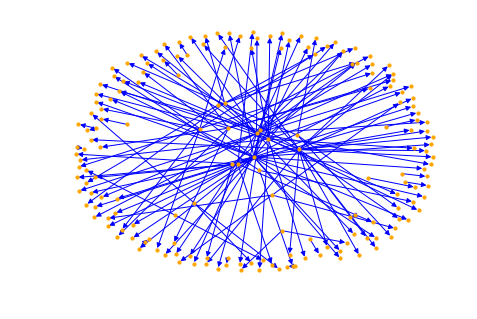

<Figure size 720x360 with 0 Axes>

In [30]:
##part5

def PlotGraph(edges):
    for row in edges.select('src','dst').take(150):
        gplot.add_edge(row['src'], row['dst'])


gplot=nx.DiGraph()

PlotGraph(g.edges)
nx.draw(gplot, **opts)
plt.figure(figsize=(10, 5))
plt.show()